In [1]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

import jp_mpl as jplot
from copy import deepcopy
from scipy import interpolate
import itertools
c            = 0.299792458*1000 # mm/ns

In [2]:
myc = itertools.cycle(['r','g','b','c','m','y','k','darkgreen', 'darkred','darkblue'])


## Comparison of the results obtained per run

In [7]:
fitdir  = '/sb/project/qbs-015-ac/jpyanez/data/SOC_reflection_fits_advanced'
histdir = '/sb/project/qbs-015-ac/jpyanez/data/SOC_histograms_python'



all_files = os.listdir(fitdir)
all_fits  = []
for one_file in all_files:
    if ('SOC' in one_file) and ('pckl' in one_file):
        all_fits.append(one_file)
        
all_fits.sort()
print all_fits

['SOC_0000017375.pckl', 'SOC_0000100556.pckl', 'SOC_0000100558.pckl', 'SOC_0000101427.pckl', 'SOC_0000101428.pckl', 'SOC_0000101432.pckl', 'SOC_0000101433.pckl', 'SOC_0000102518.pckl', 'SOC_0000102529.pckl', 'SOC_0000102552.pckl', 'SOC_0000102554.pckl', 'SOC_0000102574.pckl']


In [8]:
# Optics DB water
dbwl = np.array([200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0, 460.0, 465.0, 470.0, 475.0, 480.0, 485.0, 490.0, 495.0, 500.0, 505.0, 510.0, 515.0, 520.0, 525.0, 530.0, 535.0, 540.0, 545.0, 550.0, 555.0, 560.0, 565.0, 570.0, 575.0, 580.0, 585.0, 590.0, 595.0, 600.0, 605.0, 610.0, 615.0, 620.0, 625.0, 630.0, 635.0, 640.0, 645.0, 650.0, 655.0, 660.0, 665.0, 670.0, 675.0, 680.0, 685.0, 690.0, 695.0, 700.0, 705.0, 710.0, 715.0, 720.0, 725.0, 730.0, 735.0, 740.0, 745.0, 750.0, 755.0, 760.0, 765.0, 770.0, 775.0, 780.0, 785.0, 790.0, 795.0, 800.0, ])
gvel = np.array([182.709, 185.104, 187.309, 189.341, 191.217, 192.951, 194.558, 196.047, 197.432, 198.72, 199.92, 201.04, 202.088, 203.068, 203.986, 204.849, 205.659, 206.422, 207.14, 207.818, 208.458, 209.063, 209.636, 210.179, 210.694, 211.183, 211.648, 212.09, 212.51, 212.911, 213.294, 213.659, 214.008, 214.342, 214.661, 214.967, 215.26, 215.541, 215.81, 216.069, 216.318, 216.557, 216.787, 217.008, 217.222, 217.427, 217.626, 217.817, 218.001, 218.18, 218.352, 218.518, 218.679, 218.835, 218.986, 219.132, 219.274, 219.411, 219.544, 219.673, 219.798, 219.92, 220.038, 220.153, 220.264, 220.372, 220.478, 220.58, 220.68, 220.777, 220.872, 220.964, 221.054, 221.141, 221.226, 221.31, 221.391, 221.47, 221.547, 221.622, 221.696, 221.768, 221.838, 221.907, 221.974, 222.039, 222.104, 222.166, 222.228, 222.288, 222.346, 222.404, 222.46, 222.515, 222.569, 222.622, 222.674, 222.725, 222.775, 222.824, 222.871, 222.918, 222.964, 223.01, 223.054, 223.097, 223.14, 223.182, 223.223, 223.264, 223.303, 223.342, 223.381, 223.418, 223.455, 223.491, 223.527, 223.562, 223.597, 223.631, 223.664,])
group_vel_fcn = interpolate.InterpolatedUnivariateSpline(dbwl, gvel)

SOC_0000017375.pckl
SOC_0000100556.pckl
SOC_0000100558.pckl
SOC_0000101427.pckl
SOC_0000101428.pckl
SOC_0000101432.pckl
SOC_0000101433.pckl
SOC_0000102518.pckl
SOC_0000102529.pckl
SOC_0000102552.pckl
SOC_0000102554.pckl
SOC_0000102574.pckl


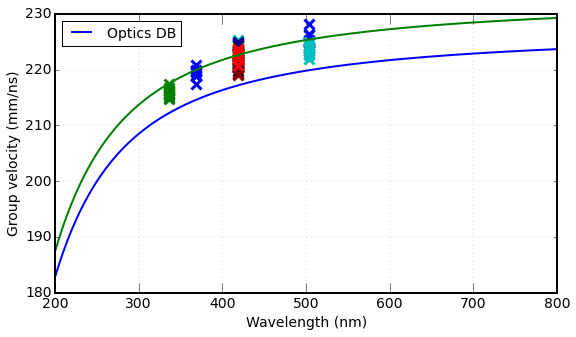

In [9]:
# Doing the group velocity study
gvfig = plt.figure(figsize=(9,5))

plt.plot(dbwl, gvel, label = 'Optics DB')

for iRun, one_fit in enumerate(all_fits):
    print one_fit
    hist = pickle.load(open(os.path.join(histdir, one_fit)))
    fit  = pickle.load(open(os.path.join(fitdir, one_fit)))
    if not hist.has_key('wavelength'):
        continue
    wl = hist['wavelength']
    thiscolor = myc.next()
    for iFit, one_key in enumerate(fit):
        thisfit = fit[one_key]
        if iFit == 0:
            continue
        if not thisfit['fit']['success']:
            continue
            
        
        plt.plot(wl, 
                     c/thisfit['fit']['x'][3], 'x', color =  thiscolor,
                     markersize=10, markeredgewidth=3)

plt.ylabel('Group velocity (mm/ns) ')
plt.xlabel('Wavelength (nm)')
plt.legend(loc=0, fontsize=14)
gvfig.savefig(os.path.join(fitdir, 'GroupVelocitySummary.png'))

plt.plot(dbwl, gvel*1.025, label = 'Optics DB modified')
gvfig.savefig(os.path.join(fitdir, 'GroupVelocitySummary_mod.png'))




SOC_0000017375.pckl
SOC_0000100556.pckl
SOC_0000100558.pckl
SOC_0000101427.pckl
SOC_0000101428.pckl
SOC_0000101432.pckl
SOC_0000101433.pckl
SOC_0000102518.pckl
SOC_0000102529.pckl
SOC_0000102552.pckl
SOC_0000102554.pckl
SOC_0000017375.pckl
SOC_0000100556.pckl
SOC_0000100558.pckl
SOC_0000101427.pckl
SOC_0000101428.pckl
SOC_0000101432.pckl
SOC_0000101433.pckl
SOC_0000102518.pckl
SOC_0000102529.pckl
SOC_0000102552.pckl
SOC_0000102554.pckl
SOC_0000017375.pckl
SOC_0000100556.pckl
SOC_0000100558.pckl
SOC_0000101427.pckl
SOC_0000101428.pckl
SOC_0000101432.pckl
SOC_0000101433.pckl
SOC_0000102518.pckl
SOC_0000102529.pckl
SOC_0000102552.pckl
SOC_0000102554.pckl


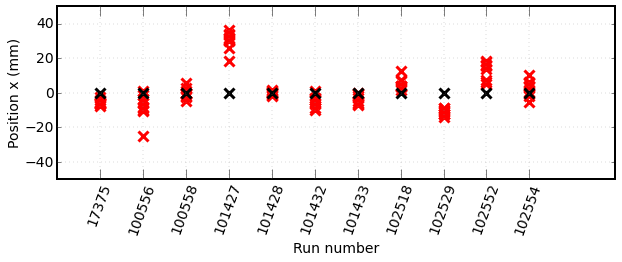

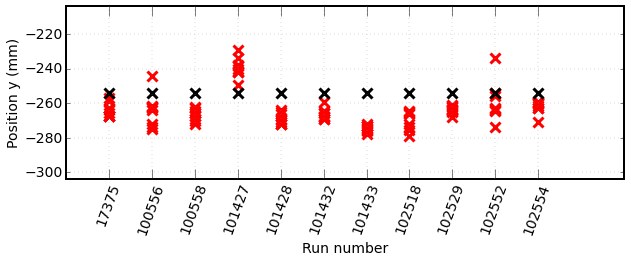

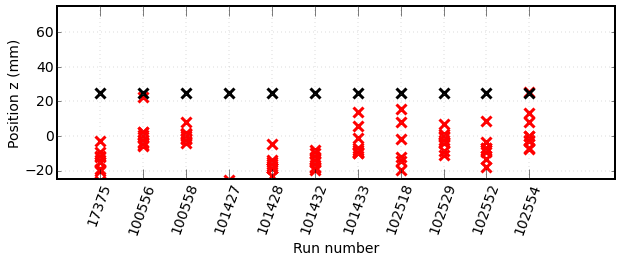

In [10]:
all_dimensions = [0,1,2]
all_labels = ['x', 'y', 'z']

for iDim in all_dimensions:
    dimension = all_dimensions[iDim]
    label = all_labels[iDim]
    fig = plt.figure(figsize=(10,4))
    runs = []
    ax = fig.add_subplot(111)
    for iRun, one_fit in enumerate(all_fits):
        if iRun > 10:
            break
        print one_fit
        runs.append(one_fit.rstrip('.pckl').lstrip('SOC_0000'))
        hist = pickle.load(open(os.path.join(histdir, one_fit)))
        fit  = pickle.load(open(os.path.join(fitdir, one_fit)))

        for iFit, one_key in enumerate(fit):
            thisfit = fit[one_key]
            if iFit == 0:
                continue
            if not thisfit['fit']['success']:
                continue
            if thisfit['fit']['nfev'] < 20:
                continue

            plt.plot(iRun,thisfit['fit']['x'][dimension], 'xr',
                     markersize=10, markeredgewidth=3,)


        plt.plot(iRun, hist['manip_pos'][dimension], 'xk',
                  markersize=10, markeredgewidth=3)



        #plt.ylim([this_manip.mean()-60, this_manip.mean()+60])
        plt.xlim([-1, len(all_fits)])
        plt.ylabel('Position ' + label + ' (mm)')
        #ax.set_xticks([])


    plt.xlabel('Run number')
    ax.set_xticks(range(0, len(runs)))
    ax.set_xticklabels(runs, rotation=70)
    plt.legend(loc=0)
    plt.ylim([-50+hist['manip_pos'][dimension], 
              50+hist['manip_pos'][dimension]])
    plt.subplots_adjust(bottom=0.3)
    fig.savefig(os.path.join(fitdir, 'Position_summary_'+label+'.png'))
